# Data Understanding


In [2]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns            
import plotly.express as px      
import warnings                  
warnings.filterwarnings('ignore')


#import the CSV File
loanData = pd.read_csv("/Users/Z00BGQF/Downloads/Loan/loan.csv")

#Data is imported 
loanData.head()

#Data is loaded into Dataframe 
ldf = pd.DataFrame(loanData)

#Check for # of rows and Columns
ldf.shape

(39717, 111)

In [3]:
# Check the overall information of the data imported
loanData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Check for Columns in the loan data
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
#check using describe function
loanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
#check the data types of columns
loanData.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data Inspection and Cleaning



In [7]:
#check for null values
loanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Drop columns with all null values
loanData.dropna(axis = 1, how = 'all', inplace = True)


In [9]:
#Verify if any columns having all null values
loanData.columns[loanData.isnull().all()]

Index([], dtype='object')

In [10]:
#Verify if any rows with all null values
loanData.isnull().all(axis=1).sum()


nullPer= round(100 *(loanData.isnull().sum()/len(loanData.index)),2)
nullPer[nullPer > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [30]:
#Check whether columns with all null values still exist
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [36]:
#Removing columns which has 30% or more null percentage
loanData.drop(nullPer[nullPer >30].index,axis=1, inplace=True)
loanData.info()


KeyError: "['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'] not found in axis"

In [16]:
#checking for Columns Unique values
loanData.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Observaton - "tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, collections_12_mths_ex_med, initial_list_status, pymnt_plan" columns are single value columns and cannot value for the analysis.

In [23]:
# Removing other irrelevant columns which have no relevance to the analysis
loanData.drop(['emp_title','title','zip_code','tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'pymnt_plan', 'initial_list_status','url','member_id','zip_code'], axis = 1, inplace = True)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [40]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [25]:
#Check for diffrent types of Loan Status
print("Loan Status Check")
print(loanData.loan_status.value_counts())

Loan Status Check
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


In [24]:
# Current loan status is Excluded
loanData = loanData[loanData.loan_status != "Current"]
loanData.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [26]:
loanData.shape

(38577, 39)

In [45]:
#  % of loan Status
(loanData.loan_status.value_counts()*100)/len(loanData)


Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

85% of loans are fully paid,

14% of loans are charged off

In [27]:
#Percentage of the Purpose for which the loans have been availed.
(loanData.purpose.value_counts()*100)/len(loanData)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [50]:
#Datatypes check and verify there numberic fields all 0's
print(loanData.isnull().sum().sort_values(ascending=False))

next_pymnt_d               38577
mths_since_last_record     35837
mths_since_last_delinq     24905
desc                       12527
emp_title                   2386
emp_length                  1033
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
title                         11
last_credit_pull_d             2
out_prncp                      0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
recoveries                     0
total_rec_late_fee             0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
last_pymnt_amnt                0
total_rec_int                  0
collection_recovery_fee        0
total_rec_prncp                0
id                             0
inq_last_6mths                 0
home_ownership                 0
funded_amnt                    0
funded_amnt_inv                0
term      

In [28]:
#Check for emp experience/length
print(loanData['emp_length'].unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [30]:
#Assuming Loan with null values emp_length have < 1 year
loanData.emp_length.fillna('< 1 year',inplace=True)

In [31]:
#Checking values post null value update
print(loanData['emp_length'].unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']


In [32]:
print(loanData['revol_util'].unique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


In [33]:
print(loanData.revol_util.isnull().sum())

50


In [40]:
#Revol util replacing null values
loanData.revol_util.fillna('0.00%', inplace=True)


In [42]:
print(loanData.isnull().sum())

id                           0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_re

In [37]:

#Dropping mths_since_last_delinq, mths_since_last_record,next_pymnt_d,desc,emp_title as these are irrelavent

loanData.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','emp_title'],axis=1,inplace=True)

KeyError: "['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'emp_title'] not found in axis"

In [41]:
loanData.drop(['desc'],axis=1,inplace=True)
print(loanData.isnull().sum())

KeyError: "['desc'] not found in axis"

In [73]:
print(loanData.isnull().sum())

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries

In [43]:
# replacing null with unkown
loanData.pub_rec_bankruptcies.fillna('Unknown',inplace=True)

In [48]:
print(loanData['pub_rec_bankruptcies'].unique())

[0.0 1.0 2.0 'Unkown']


In [49]:
print(loanData.pub_rec_bankruptcies.isnull().sum())

0


In [50]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

# DataType correction

In [51]:
#Correcting the data types 
loanData['pub_rec_bankruptcies_dive'] = loanData.pub_rec_bankruptcies
loanData['pub_rec_bankruptcies_dive'].replace(['Unkown'],['0.0'],inplace=True)


In [52]:
loanData.pub_rec_bankruptcies_dive = loanData.pub_rec_bankruptcies_dive.apply(pd.to_numeric)

In [53]:
loanData['int_rate_dive'] = loanData['int_rate'].str.rstrip('%')
loanData.int_rate_dive = loanData.int_rate_dive.apply(pd.to_numeric)
loanData['annual_inc'] = loanData['annual_inc'].astype(int)
loanData['issue_d'] = pd.to_datetime(loanData.issue_d.str.upper(), format = '%b-%y', yearfirst=False)
loanData['issue_d_yr'] = loanData.issue_d.year
loanData['issue_d_mth'] = loanData.issue_d.strftime('%b')

In [59]:

loanData['earliest_cr_line'] = pd.to_datetime(loanData.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
loanData['earliest_cr_line_yr'] = loanData.earliest_cr_line.dt.year
loanData['earliest_cr_line_mth']= loanData.earliest_cr_line.dt.strftime('%b')

                                                                        

In [60]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  object        
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  object        
 11  annual_inc                 38577 non-null  int64         
 12  veri

In [62]:
# converting loan status to mark 0 and 1
loanData['loan_status_dive'] =loanData['loan_status']
loanData['loan_status_dive'].replace(['Fully Paid','Charged Off'],[0,1],inplace=True)
loanData['loan_status_dive'] = loanData['loan_status_dive'].astype(int)

In [63]:
loanData.shape

(38577, 44)

#Derived Categorial Analysis


In [77]:
#Categorizing the columns 

loanData.loan_status = loanData.loan_status.astype('category')
loanData.purpose = loanData.purpose.astype('category')
loanData.addr_state= loanData.addr_state.astype('category')
loanData.home_ownership= loanData.home_ownership.astype('category')
loanData.verification_status = loanData.verification_status.astype('category')
loanData.grade = loanData.grade.astype('category')

In [74]:
# Creating Annual Income Categorical data
cut_bins = [0, 5000, 10000, 20000, 30000, 50000, 75000, 100000, 200000, 300000, 500000, 800000, 1000000, 1500000, 2000000]
cut_lables = ['0 - 5000', '5000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '50000 - 75000', '75000 - 100000', '100000 - 200000', '200000 - 300000', '300000 - 500000', '500000 - 800000', '800000 - 1000000', '1000000 - 1500000', ' > 1500000']
loanData['annual_inc_dive'] = pd.cut(x=loanData['annual_inc'], bins = cut_bins, labels = cut_lables)

In [75]:
loanData['funded_amnt_inv_dive'] = pd.cut(loanData['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loanData['funded_amnt_dive'] = pd.cut(loanData['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
loanData['loan_amnt_dive'] = pd.cut(loanData['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [79]:
 #Create categorical derived column for Interest Rate
loanData['int_rate_dive2'] = pd.cut(loanData['int_rate_dive'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [72]:
loanData.shape

(38577, 49)

In [78]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  category      
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  category      
 11  annual_inc                 38577 non-null  int64         
 12  veri

# Checking for outliers


<AxesSubplot:xlabel='loan_amnt'>

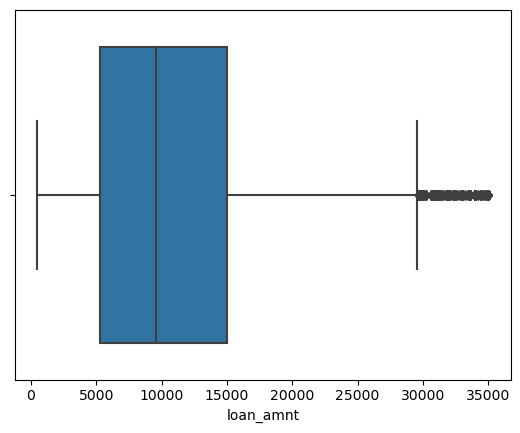

In [80]:
#loan_amt 

sns.boxplot(loanData['loan_amnt'])

In [90]:
# Checking % for loan_amnt

loanData.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.0975,0.98,0.99,1.0])

0.7500    15000.0
0.9000    21600.0
0.9500    25000.0
0.9700    28000.0
0.0975     3000.0
0.9800    30000.0
0.9900    35000.0
1.0000    35000.0
Name: loan_amnt, dtype: float64

In [92]:
Charged_df = loanData[loanData.loan_status == 'Charged Off']
Charged_df.shape

(5627, 49)

#### Data seems continous so no action taken


# Univariate Analysis


<AxesSubplot:xlabel='loan_status', ylabel='count'>

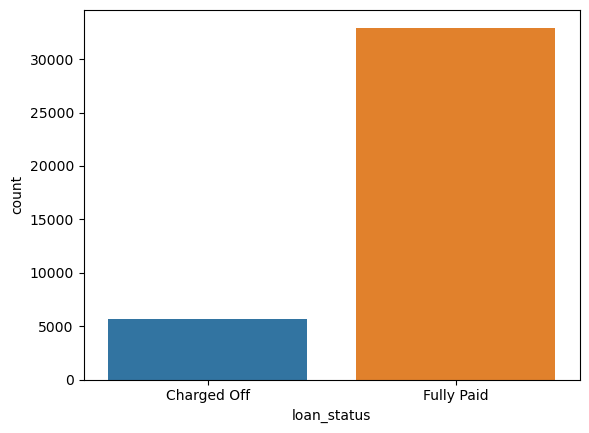

In [83]:
sns.countplot(loanData.loan_status)



Observation - Fully paid loans are way more than compared to Charged Off


Text(0.5, 1.0, 'Loan Amount Analysis')

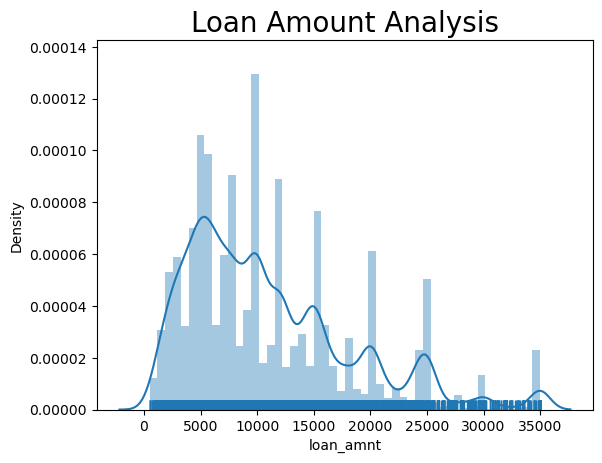

In [86]:
# Analysis on Loan Amt
sns.distplot(a=loanData.loan_amnt, rug=True)
plt.title('Loan Amount Analysis', size=20)



Text(0.5, 1.0, 'Loan Amount Percentage')

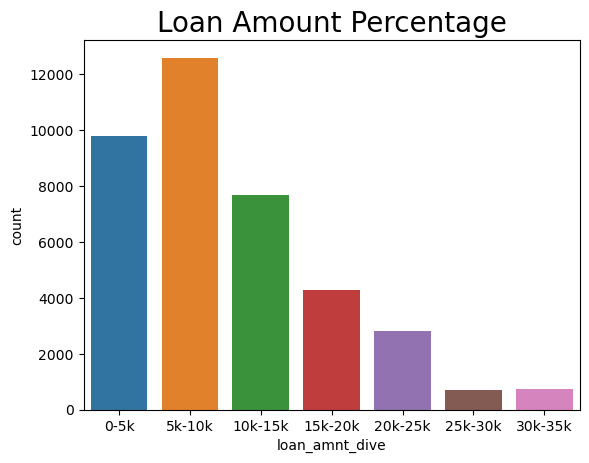

In [87]:

sns.countplot(x='loan_amnt_dive', data=loanData)
plt.title('Loan Amount Percentage', size=20)

<AxesSubplot:ylabel='loan_amnt_dive'>

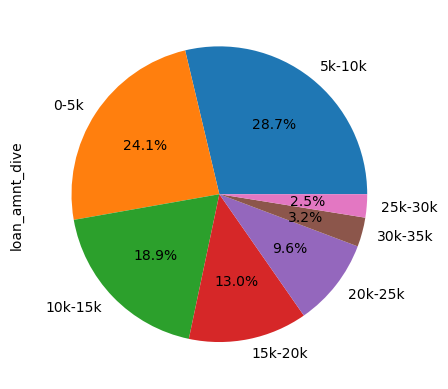

In [98]:

Charged_df['loan_amnt_dive'].value_counts().plot(kind="pie", autopct='%1.1f%%')


In [99]:
loanData.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Obervations - 

#### - loan amount varies from 500-35k with average of 9600
#### - Majority of loan is provided for amount between 5k-10k
#### - Charged off loan count is higher for  amount 5k-10k

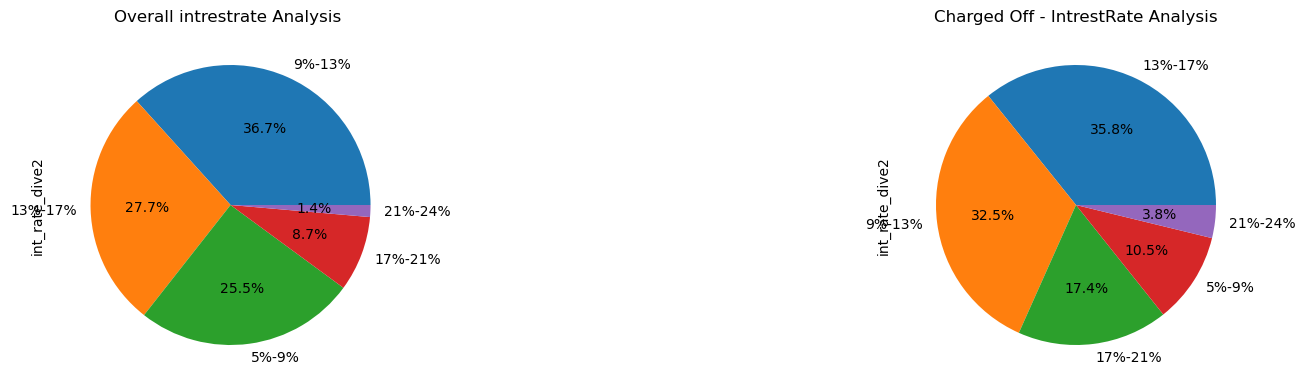

In [107]:
# Intrest rate Analysis

plt.figure(figsize=(20,10))
#Total Loans
plt.subplot(2,2,3)
loanData['int_rate_dive2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall intrestrate Analysis ')

#Charged Off Loan
plt.subplot(2,2,4)
Charged_df['int_rate_dive2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Charged Off - IntrestRate Analysis')

plt.show()


-  More than 30% of overall intrest between 9-13%
- Around 50% of Charged Off loans are in 13-21% intrest rate range


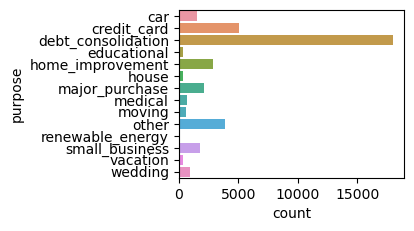

In [111]:
#Purpose of Loan Analysis

plt.subplot(2,2,1)
sns.countplot(y=loanData.purpose)


plt.show()



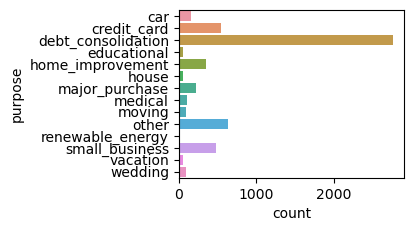

In [112]:

plt.subplot(2,2,2)
sns.countplot(y=Charged_df.purpose)

plt.show()

Obervations -
- Loans taken for Debt Consolidation purpose are major defaulters, followed for credit card & others. Same for Charged off loans


# Segmented Univariate Analysis


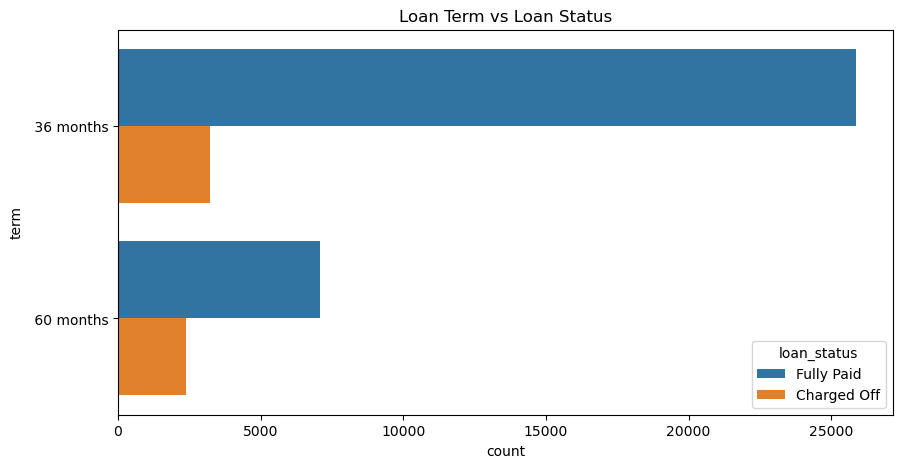

In [117]:
# Loan Term vs Loan Status

plt.figure(figsize=(10,5))
sns.countplot(data=loanData, y='term', hue='loan_status', hue_order=['Fully Paid','Charged Off'])
plt.title('Loan Term vs Loan Status')
plt.show()

Obeservation:
- 60 month terms has higher numbers of defaulters


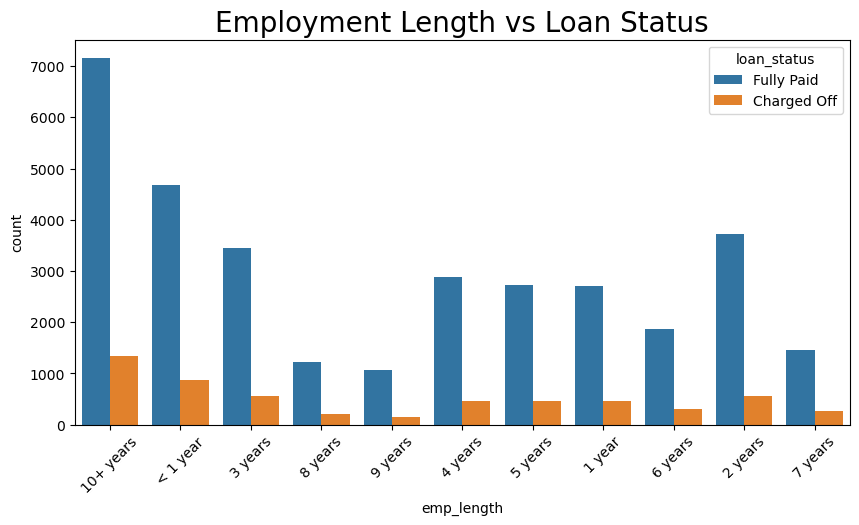

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(data=loanData, x='emp_length', hue='loan_status', hue_order=['Fully Paid','Charged Off'])
plt.title('Employment Length vs Loan Status',size=20)
plt.xticks(rotation=45)
plt.show()

- Loan applications with 10+ years of experience are most likely to default loans.


# Bivariate Analysis




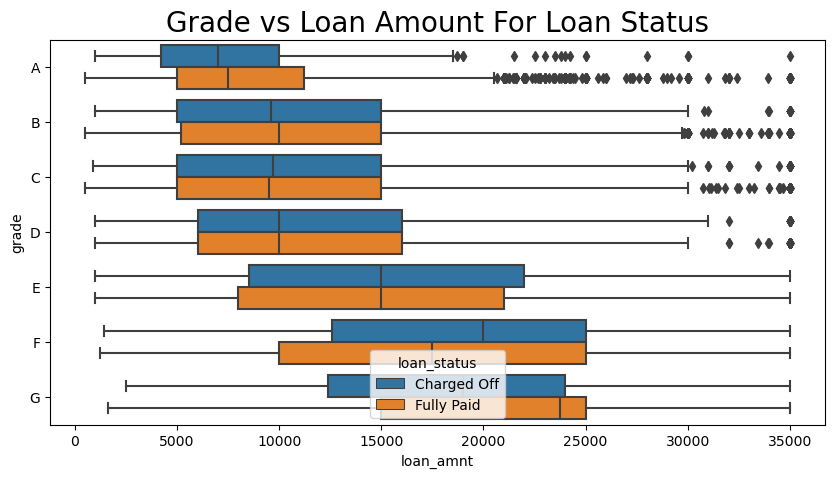

In [122]:
#Grouping Loan Amount, Grade ans status
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_amnt', y='grade', hue='loan_status', data=loanData, order=['A','B','C','D','E','F','G'])
plt.title('Grade vs Loan Amount For Loan Status', size=20)
plt.show()

Observation:
- Charged Off loans are lower for Grade A and G 
- Charged Off Loans are higher in numbers for B to F


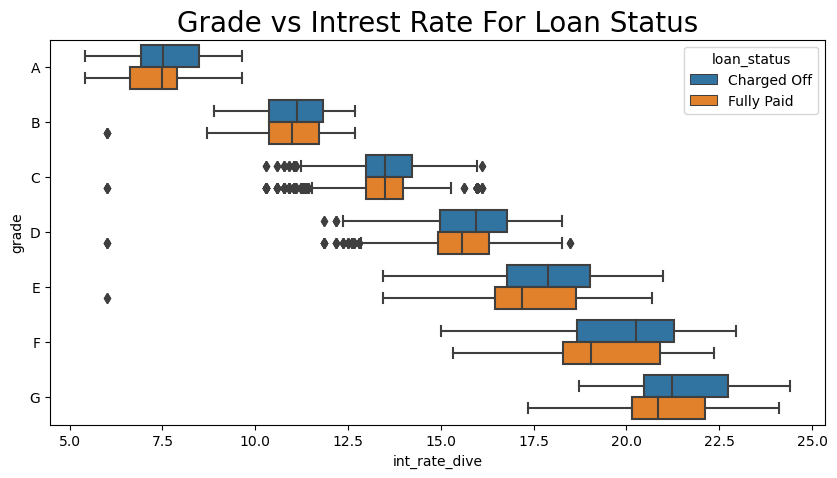

In [123]:
#Grouping Loan Amount, Grade ans Intrest Rate
plt.figure(figsize=(10,5))
sns.boxplot(x='int_rate_dive', y='grade', hue='loan_status', data=loanData, order=['A','B','C','D','E','F','G'])
plt.title('Grade vs Intrest Rate For Loan Status', size=20)
plt.show()

Observations
- The Defaulted loans stedily increase as we move from Garde B to G


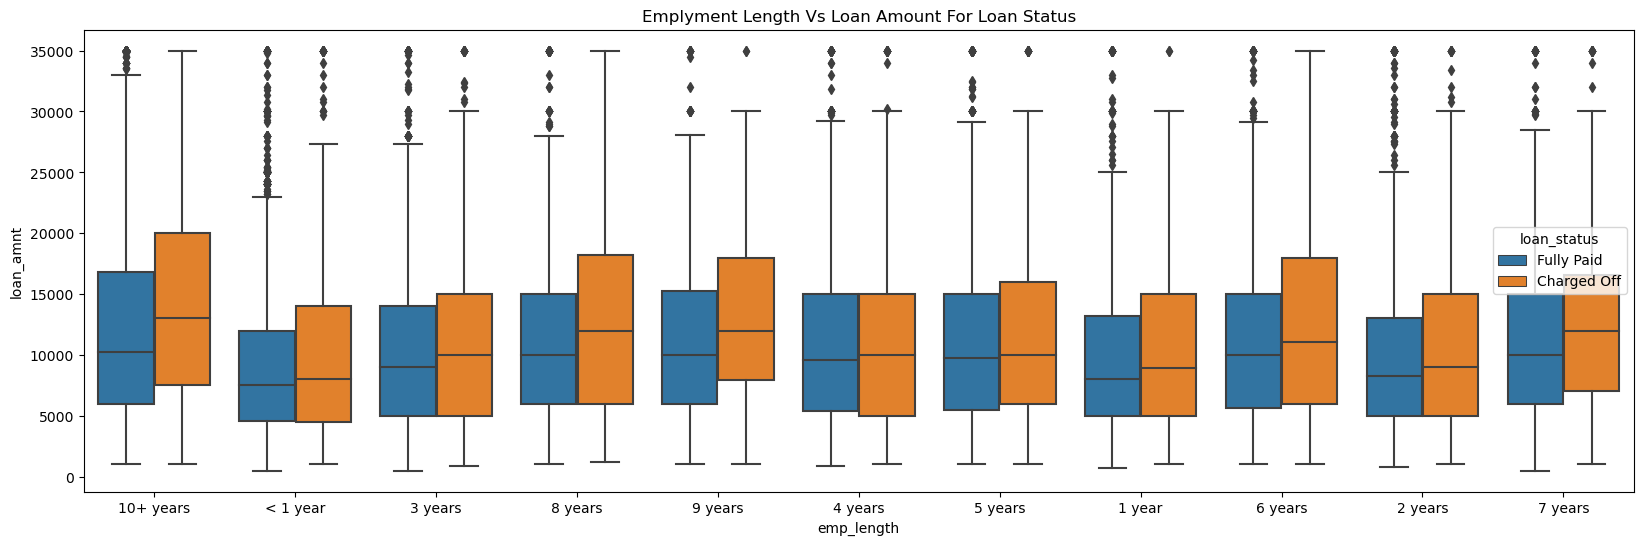

In [124]:
#Employment Length , Loan amount and Loan Status
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loanData, hue_order=['Fully Paid','Charged Off'])
plt.title('Emplyment Length Vs Loan Amount For Loan Status')
plt.show()

Observations :
- Higher Experienced Loan Applicants are higher loan amount sanctioned and also have higher defaults

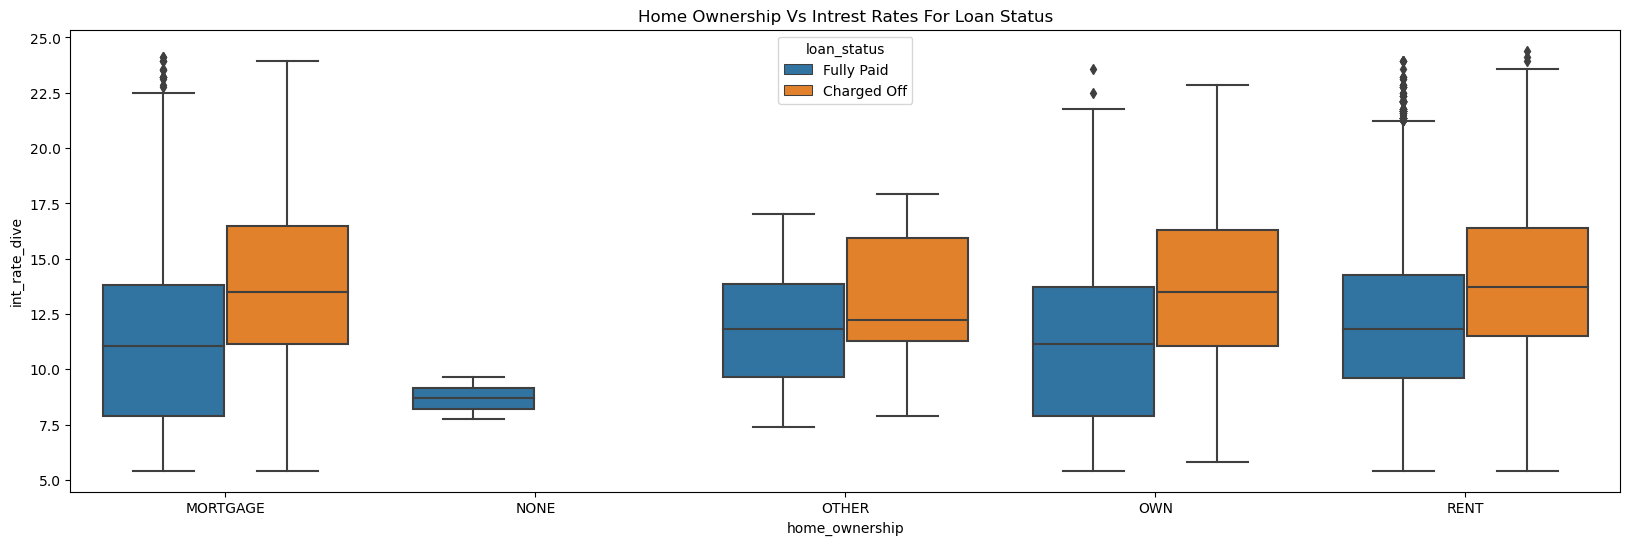

In [125]:
#Home Ownership Vs Intrest Rates Vs Loan Status

plt.figure(figsize=(20,6))
sns.boxplot(x='home_ownership', y='int_rate_dive', hue='loan_status', data=loanData, hue_order=['Fully Paid','Charged Off'])
plt.title('Home Ownership Vs Intrest Rates For Loan Status')
plt.show()

####  Observation:
- Higher Interest Rates for Charged Off Loans
- Fully Paid Loans have significantly lower intrest Rates than the Charged Off laons

# Correlation Analysis on Dataset



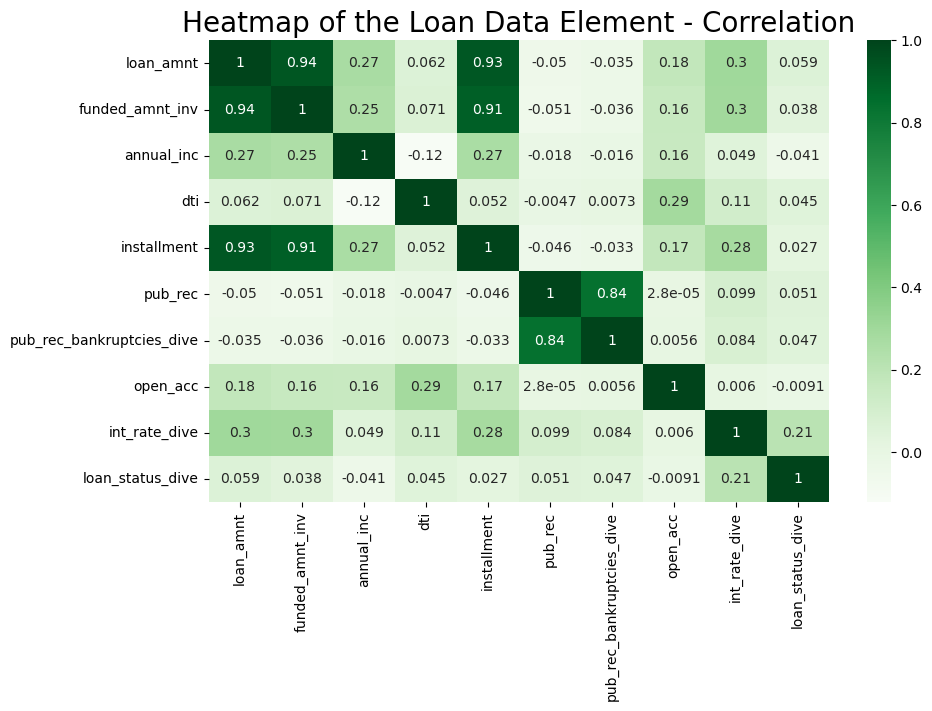

In [131]:
corr_df = loanData[['loan_amnt','funded_amnt_inv','annual_inc', 'dti', 'installment','pub_rec','pub_rec_bankruptcies_dive','open_acc','int_rate_dive', 'loan_status_dive']]

plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(),annot=True, cmap='Greens')
plt.title('Heatmap of the Loan Data Element - Correlation', size=20)
plt.show()

Observations:

- Highest positive corelation can be seen between loan amount , funded investment and installment
- Next highest Positive Correlation for loan applicants with Public Derogatory records and Public Bankruptcy Records
-  Negative corelation can be seen between annual inc and dti

# Observation Summary:


## Univariate Analysis:

- Fully paid loans are way more than compared to Charged Off
- 75% of the loans are sanctioned for the term of 36 Months
- Loan Amount varies from 500 to 35K and approx. 80% of the loans are sanctioned for loan amount in range of 500 – 15K
- 75% of loans defaulted  are in the loan amount range of 5k – 10K.
- More than 30% of overall intrest between 9-13%
- Around 50% of Charged Off loans are in 13-21% intrest rate range
- Loans taken for Debt Consolidation purpose are major defaulters, followed for credit card & others. Same for Charged off loans
- 60 month terms has higher numbers of defaulters
- Loan applications with 10+ years of experience are most likely to default loans.



## Segmented Univariate Analysis


- 60 month term loans are more chance of defaulting loans, where as 36 month term loans have higher chance of being fully paid.
- Loans availed for purpose of Debt Consolidation have highest number of loans, also have highest number of Fully Paid and Charged Off Loans.

# Bivariate Analysis


- Interest Rate for Charged Off Loans is higher than the Fully Paid loans for both 36 months and 60 months term. Indicates that loans with higher interest rate are more likely to be defaulted.
- Charged Off loans are lower for Grade A, the defaulted loans steadily increase as we move from higher grades to lower grades.
- Higher Grades have lower loan amount and interest rates than lower grades, this indicates that lower the grade higher the risk and hence higher interest rates. Also, the fact that lower grades have higher loan amount sanctioned.
- Even though the loan applicants whose Source of Income is not verified is higher, the defaulted loans are higher for loan applicants whose source of income is verified.
- Higher Interest Rates for Charged Off Loans
- Fully Paid Loans have significantly lower intrest Rates than the    Charged Off laons

# Recommendations

#### The probability of defaulting is high when:

- Loan Applicants in lower Grades seeking loan amount > 15K and interest rate > 10%.
- Loan Applicants not owing home (Mortgage or Rent) and have high Annual Income Range (60K - 70K)
- Loans with interest rates between 9% - 17%
- Loan Applicants with >10 years of experience and with loan amount > 10K or with interest rate (>10%)


## Driving Factors  for Loan Defaulters:
* Grades, Annual Income, DTI , Purpose of Loan, Loan Amount, Interest Rate